In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/seeds.csv')

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
length.1       0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

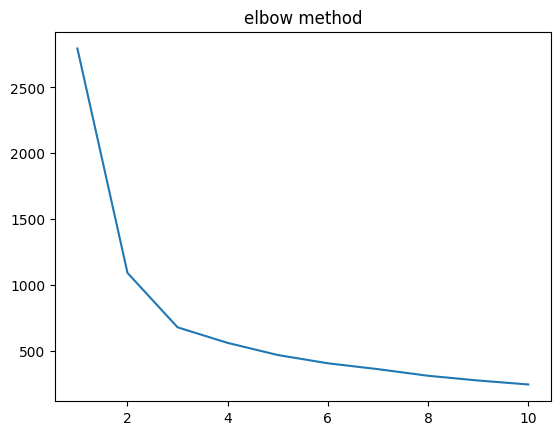

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(df)
df['clusters'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='clusters'>

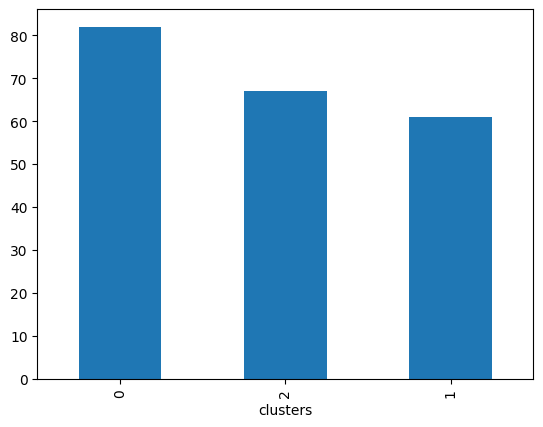

In [ ]:
(df.clusters.value_counts()).plot(kind='bar')

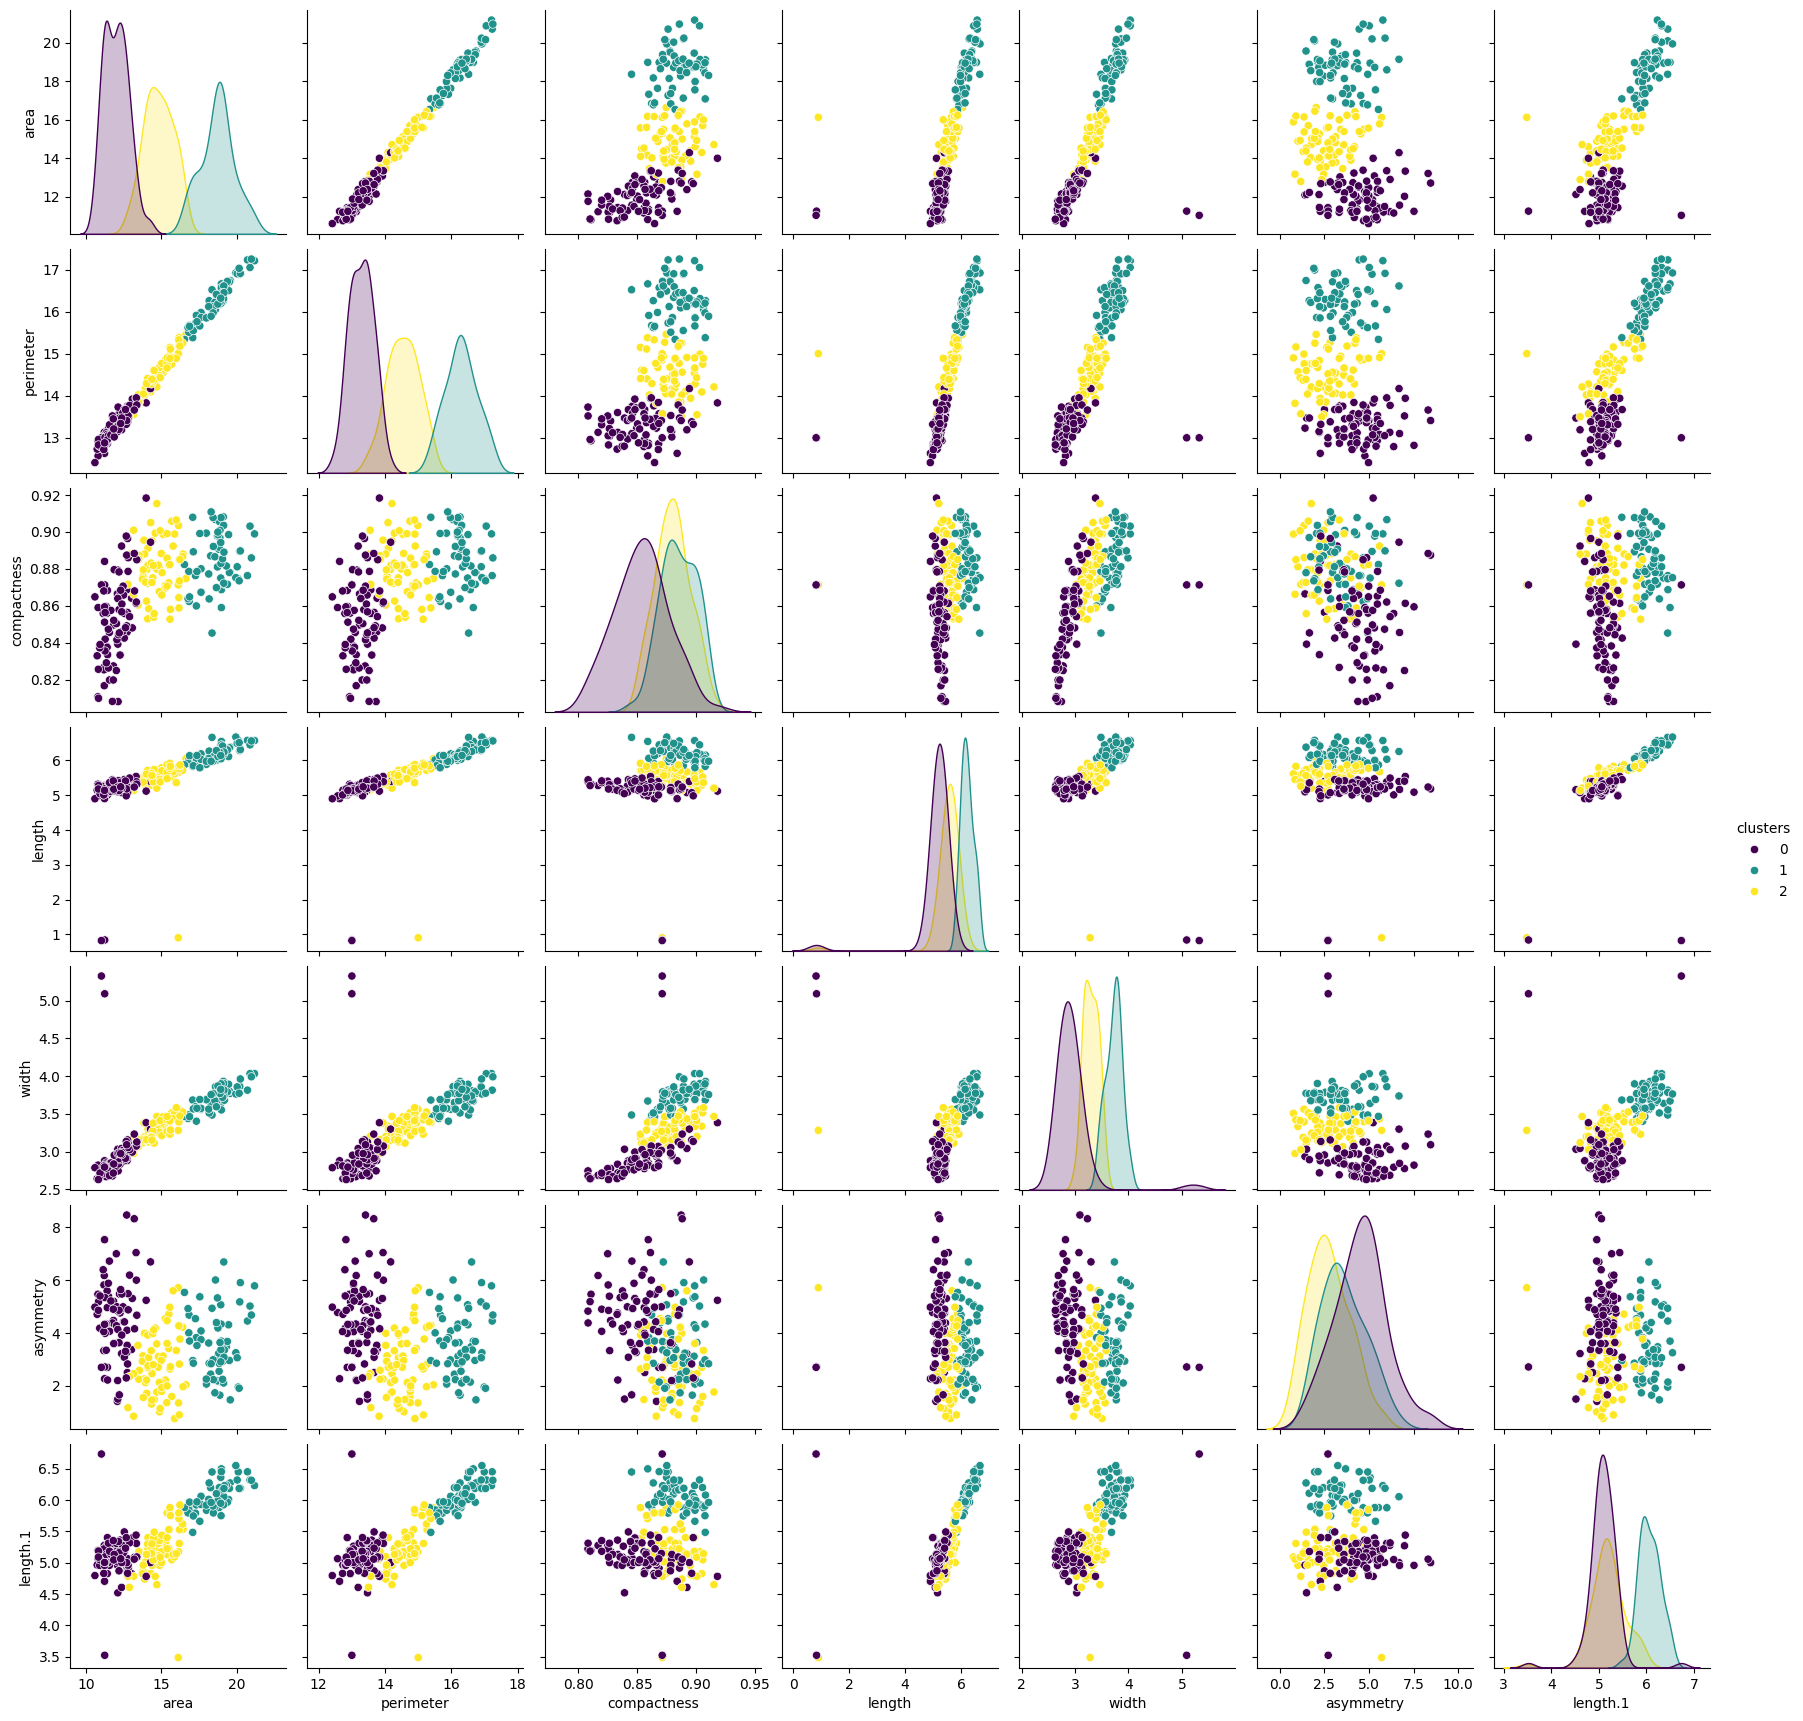

In [ ]:
sns.pairplot(df, hue='clusters', palette='viridis')
plt.show()

In [ ]:
cluster_centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(cluster_centroids)
print("Cluster centroids:")
print(centroids_df)

Cluster centroids:
           0          1         2         3         4         5         6
0  11.988659  13.284390  0.853807  5.120595  2.941049  4.524902  5.091963
1  18.721803  16.297377  0.885087  6.208934  3.722672  3.603590  6.066098
2  14.819104  14.537164  0.880094  5.519239  3.296320  2.757913  5.193701


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, clusters)

In [ ]:
silhouette_avg

0.5041838093987927